In [7]:
import random
import numpy as np
from scipy.stats import uniform, binom, norm
import statsmodels.stats as sm
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

## Z-test для двух выборок c биномиальным распределением

In [8]:
n = random.choice([i for i in range(490,510+1)])
m = random.choice([i for i in range(490,510+1)])

In [9]:
# Генерим вероятности успеха
p_x = uniform.rvs(size=1, loc=0, scale=1) 
p_y = uniform.rvs(size=1, loc=0, scale=1) 
print(p_x)
print(p_y)

[0.48441125]
[0.58537281]


In [10]:
x = binom.rvs(n=1, p=0.5, size=n)
y = binom.rvs(n=1, p=p_y, size=m)

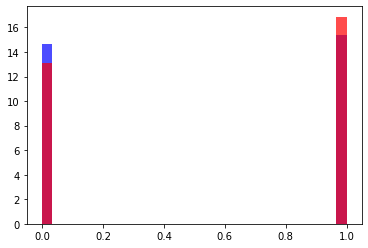

In [11]:
plt.hist(x, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(y, bins=30, density=True, color='red', alpha=0.7)
plt.show()

Посчитаем по формуле

In [12]:
p_x_est = sum(x)/n
p_y_est = sum(y)/m
P = (p_x_est*n + p_y_est*m)/(n + m)
Z = (p_x_est - p_y_est)/np.sqrt(P*(1 - P)*(1/n + 1/m))
p_x_est

0.5117647058823529

In [13]:
p_value = (1 - norm.cdf(abs(Z)))*2
p_value, Z

(0.10591358263386152, -1.616836479975256)

Посчитаем через prop.test

In [19]:
stat, pval = proportions_ztest([1599, 1580], 
                                [16500, 15903], alternative='smaller') 
print("test statistic =", stat)
print("p-value =", pval)

test statistic = -0.7391350963987632
p-value = 0.22991248360663058


Нам нужно сравнить 2 выборки с распределением Бернулли, будем применять Z-критерий для 2 долей